In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Teilaufgabe a)
#  Probleme wenn durch 0 geteilt wird
#  1 - b**2 cos(theta)**2 darf nicht 0 werden sonst wird GL numerisch instabil
#  das heißt b**2 cos(theta)**2 darf nicht 1 werden 
#  b = 0.9999999 -> Bereiche um theta = 0, pi , 2pi ... sind kritisch

In [6]:
#Variablen

m_e = 0.000511 

E_e = 50

g = E_e/m_e

a = 1/137

s = (2*E_e)**2

b = np.sqrt(1-g**(-2))

In [7]:
def dsigma(theta):
    return a**2 / s * ( (2 + np.sin(theta)**2) / (1 - b**2 * np.cos(theta)**2) )
def dneu(theta):
    return a**2 / s * ( (2*g**2) / (g**2 * np.sin(theta)**2 + np.cos(theta)**2) + (np.sin(theta)**2 * g**2) / (g**2 * np.sin(theta)**2 + np.cos(theta)**2) )

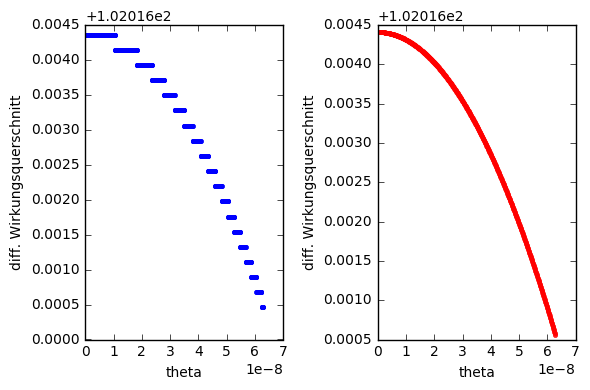

In [8]:
# x Werte erstellen, Nullstellen liegen bei Vielfachen von pi
x = np.pi*(np.arange(1000,dtype=float) + 1)*2*10**(-11)


# Werte plotten für die 2 verschiedenen Funktionen

plt.subplot(1,2,1)
plt.plot(x,dsigma(x), 'b.')
plt.xlabel('theta')
plt.ylabel('diff. Wirkungsquerschnitt')


plt.subplot(1,2,2)

plt.plot(x, dneu(x) , 'r.', alpha=0.5)
plt.xlabel('theta')
plt.ylabel('diff. Wirkungsquerschnitt')

plt.tight_layout()

plt.savefig('afg4c.pdf')

In [9]:
import sympy
from sympy import *
from sympy import Function, Symbol, Derivative
a = Symbol('a')
s = Symbol('s')
g = Symbol('g')
o = Symbol('o')
x = Symbol('x')

init_printing()

In [10]:
latex(simplify(diff( a**2 / s * ( (2*g**2) / (g**2 * sin(x)**2 + cos(x)**2) + (sin(x)**2 * g**2) / (g**2 * sin(x)**2 + cos(x)**2)),x)))

'\\frac{4 a^{2} g^{2} \\left(- 2 g^{2} + 3\\right) \\sin{\\left (2 x \\right )}}{s \\left(- g^{2} \\cos{\\left (2 x \\right )} + g^{2} + \\cos{\\left (2 x \\right )} + 1\\right)^{2}}'

In [11]:
latex(simplify( diff( a**2 / s * ( (2*g**2) / (g**2 * sin(x)**2 + cos(x)**2) + (sin(x)**2 * g**2) / (g**2 * sin(x)**2 + cos(x)**2)),x) / ( a**2 / s * ( (2*g**2) / (g**2 * sin(x)**2 + cos(x)**2) + (sin(x)**2 * g**2) / (g**2 * sin(x)**2 + cos(x)**2)))))

'\\frac{\\left(- 4 g^{2} + 6\\right) \\sin{\\left (x \\right )} \\cos{\\left (x \\right )}}{\\left(g^{2} \\sin^{2}{\\left (x \\right )} + \\cos^{2}{\\left (x \\right )}\\right) \\left(\\sin^{2}{\\left (x \\right )} + 2\\right)}'

In [12]:
#Variablen

m_e = 0.000511 

E_e = 50

g = E_e/m_e

a = 1/137

s = (2*E_e)**2

b = np.sqrt(1-g**(-2))

In [13]:
def ableitung(theta):
    return (4 * a**2 * g**2 * (-2 * g**2 +3) * np.sin(2*theta) ) / (s * (-g**2 * np.cos(2*theta) + g**2 + np.cos(2*theta) +1)**2)

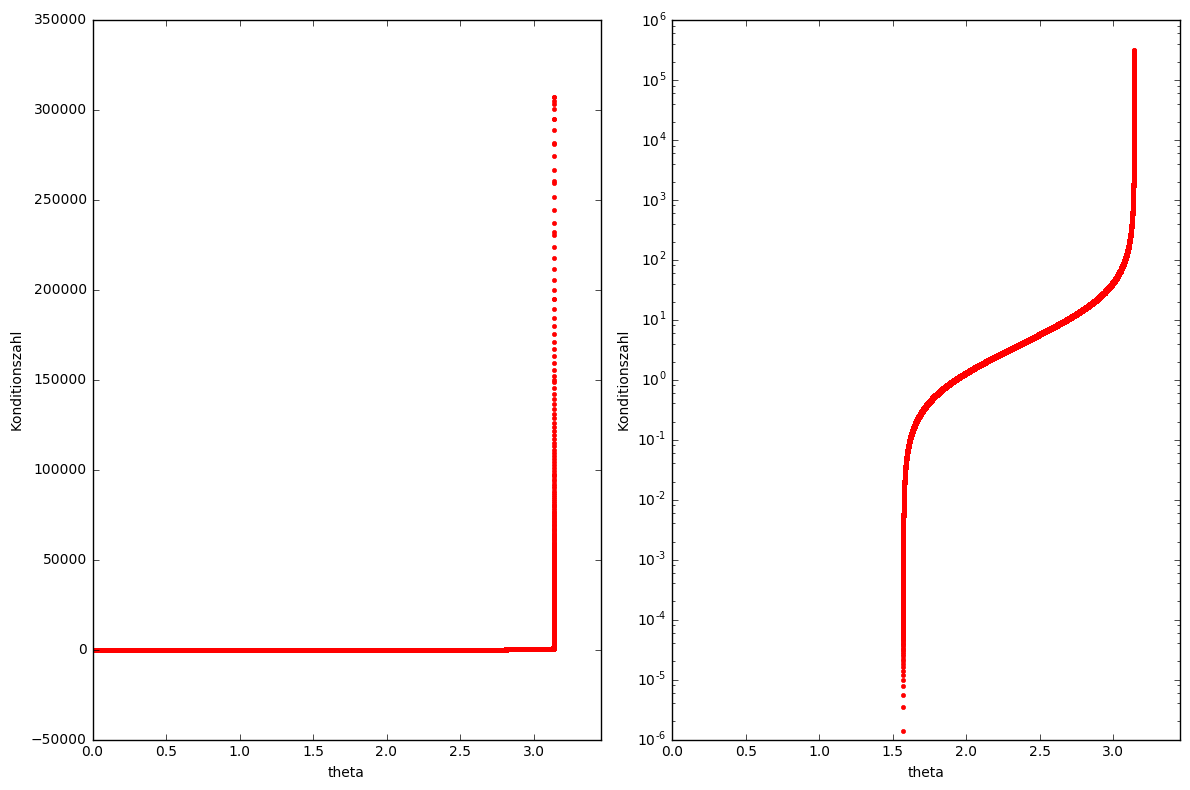

In [15]:
def k(theta):
    return theta * (ableitung(theta) /dneu(theta) )


plt.figure(figsize=(12,8))

x = np.arange(0, np.pi, 0.000001)
plt.subplot(1,2,1)

plt.plot(x , k(x) , 'r.')

plt.xlim(0, 1.1*np.pi)

plt.xlabel('theta')
plt.ylabel('Konditionszahl')

plt.subplot(1,2,2)

plt.plot(x , k(x) , 'r.')

plt.xlim(0, 1.1*np.pi)

plt.xlabel('theta')
plt.ylabel('Konditionszahl')

plt.yscale('log')
plt.tight_layout()

plt.savefig('afg4e.pdf')